<h2>ANALYST : JOHN PAUL R. NIEVA</h2>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
chicago = pd.read_csv("C:\\Users\\KRIANA\\Downloads\\Chicago_Crimes.csv")
chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3><b>Descriptive Analytics</b></h3>

In [3]:
chicago.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [4]:
chicago.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,249123.0,1.358652e+07,647319.161410,2.807300e+04,1.352322e+07,1.361560e+07,1.370865e+07,1.381045e+07
Beat,249123.0,1.153846e+03,707.959752,1.110000e+02,5.330000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,249123.0,1.130892e+01,7.074807,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,249123.0,2.318682e+01,13.925951,1.000000e+00,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,249120.0,3.623856e+01,21.567485,1.000000e+00,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,249033.0,1.165309e+06,16168.139632,1.092647e+06,1.153981e+06,1.167190e+06,1.176662e+06,1.205119e+06
Y Coordinate,249033.0,1.887602e+06,31462.770629,1.813897e+06,1.860560e+06,1.894278e+06,1.910282e+06,1.951517e+06
Year,249123.0,2.024242e+03,0.428095,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Latitude,249033.0,4.184716e+01,0.086517,4.164459e+01,4.177271e+01,4.186562e+01,4.190971e+01,4.202256e+01
Longitude,249033.0,-8.766884e+01,0.058875,-8.793457e+01,-8.771007e+01,-8.766169e+01,-8.762723e+01,-8.752453e+01


<h3>Checking Null Values</h3>

In [5]:
chicago.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3>Filling Up Null Values</h3>

In [6]:
chicago['Location Description'] = chicago['Location Description'].fillna(chicago['Location Description'].mode()[0])
chicago['Community Area'] = chicago['Community Area'].fillna(chicago['Community Area'].mean())
chicago['X Coordinate'] = chicago['X Coordinate'].fillna(chicago['X Coordinate'].mean())
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna(chicago['Y Coordinate'].mean())
chicago['Latitude'] = chicago['Latitude'].fillna(chicago['Latitude'].mean())
chicago['Longitude'] = chicago['Longitude'].fillna(chicago['Longitude'].mean())
chicago['Location'] = chicago['Location'].fillna(chicago['Location'].mode()[0])

In [7]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h3>Categorical Data</h3>

In [8]:
chicago['Case Number'] = chicago['Case Number'].astype('category')
chicago['Date'] = chicago['Date'].astype('category')
chicago['Block'] = chicago['Block'].astype('category')
chicago['IUCR'] = chicago['IUCR'].astype('category')
chicago['Primary Type'] = chicago['Primary Type'].astype('category')
chicago['Description'] = chicago['Description'].astype('category')
chicago['Location Description'] = chicago['Location Description'].astype('category')
chicago['FBI Code'] = chicago['FBI Code'].astype('category')
chicago['Updated On'] = chicago['Updated On'].astype('category')
chicago['Location'] = chicago['Location'].astype('category')

In [9]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    249123 non-null  int64   
 1   Case Number           249123 non-null  category
 2   Date                  249123 non-null  category
 3   Block                 249123 non-null  category
 4   IUCR                  249123 non-null  category
 5   Primary Type          249123 non-null  category
 6   Description           249123 non-null  category
 7   Location Description  249123 non-null  category
 8   Arrest                249123 non-null  bool    
 9   Domestic              249123 non-null  bool    
 10  Beat                  249123 non-null  int64   
 11  District              249123 non-null  int64   
 12  Ward                  249123 non-null  int64   
 13  Community Area        249123 non-null  float64 
 14  FBI Code              249123 non-nul

<h3>Clearing any Inconsistencies with the Dataset</h3>

In [10]:
chicago['Date'] = chicago['Date'].str.strip()
chicago['Date'] = chicago['Date'].astype('str')
chicago['Date'] = chicago['Date'].str.replace('/', '-')

In [11]:
chicago['Date'] = pd.to_datetime(chicago['Date'], dayfirst = True, errors = 'coerce')

In [12]:
chicago['Year'] = chicago['Date'].dt.year
chicago['Month'] = chicago['Date'].dt.month
chicago['Day'] = chicago['Date'].dt.day
chicago['DayOfWeek'] = chicago['Date'].dt.dayofweek

In [13]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
dtype: int64

In [14]:
chicago.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

<h1>Thirty-five (35) Insight</h1>

<h3>Which are the top 5 most common types of crimes in Chicago?</h3>

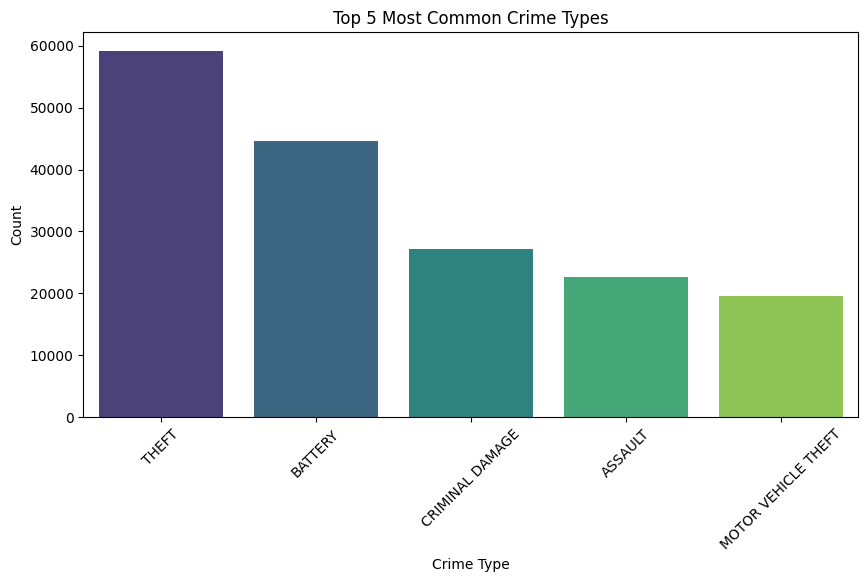

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=chicago, 
    x='Primary Type', 
    order=chicago['Primary Type'].value_counts().index[:5], 
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title("Top 5 Most Common Crime Types")
plt.ylabel("Count")
plt.xlabel("Crime Type")
plt.show()


<h3>INSIGHT 1 : Most crimes in Chicago are thefts, way more than any other type. After that, battery comes next, but still much less than theft. Crimes like criminal damage, assault, and motor vehicle theft happen often too, but they’re not as common. So overall, stealing (especially theft) is the biggest crime problem in the city.</h3>

<h3>How many crimes were reported each year?</h3>

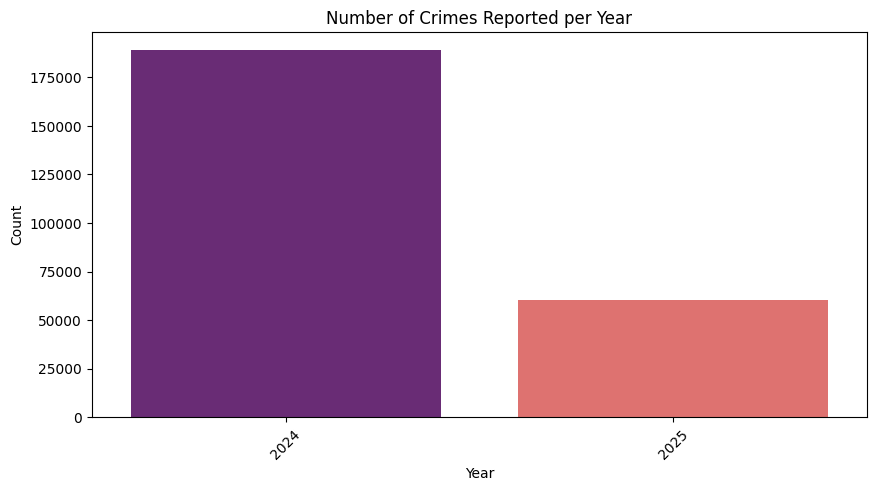

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=chicago,
    x='Year',
    order=chicago['Year'].value_counts().index.sort_values(),
    palette='magma'
)
plt.xticks(rotation=45)
plt.title("Number of Crimes Reported per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()


<h3>INSIGHT 2 : In 2024, there were way more crimes reported than in 2025. This suggests that crime counts have dropped in 2025 compared to the previous year.<h3>

<h3>INSIGHT 3 : 2025 has fewer crimes recorded, but this might be because the year isn’t finished yet. The data for 2025 could still increase as more months are added.<h3>

<h3>What percentage of crimes resulted in an arrest?</h3>

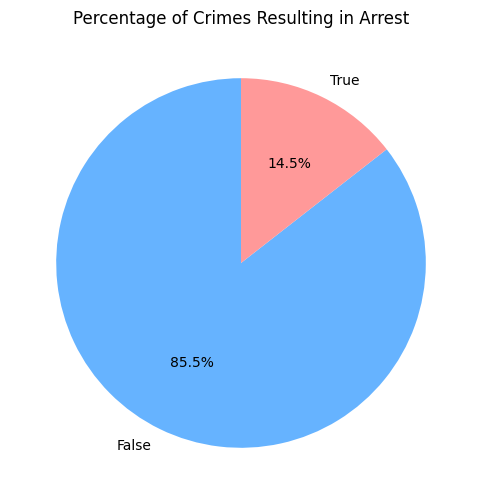

In [17]:
arrest_counts = chicago['Arrest'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    arrest_counts, 
    labels=arrest_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff','#ff9999']
)
plt.title("Percentage of Crimes Resulting in Arrest")
plt.show()


<h3>INSIGHT 4 : Only about 14.5% of crimes in Chicago lead to an arrest, while the majority 85.5% do not result in an arrest.<h3>

<h3>Which month records the highest number of crimes in a year?</h3>

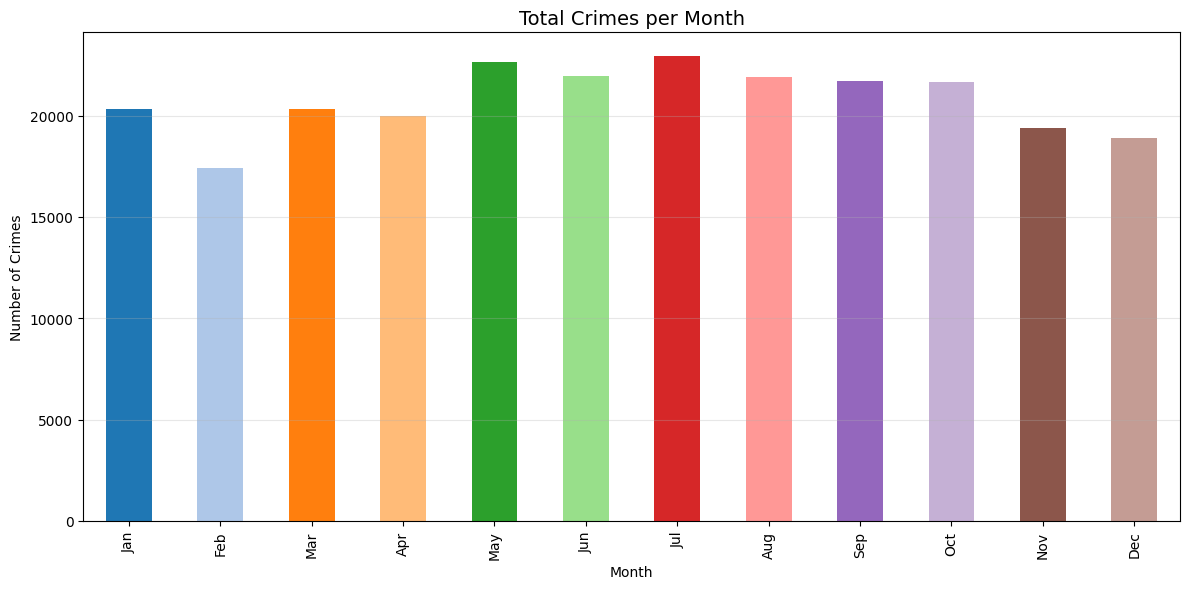

In [18]:
chicago['Month'] = chicago['Date'].dt.month

crimes_per_month = chicago['Month'].value_counts().sort_index()

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
crimes_per_month.index = crimes_per_month.index.map(month_names)

plt.figure(figsize=(12,6))
colors = sns.color_palette("tab20", 12) 
crimes_per_month.plot(kind='bar', color=colors)

plt.title("Total Crimes per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<h3>INSIGHT 5 : July has the highest number of crimes compared to all other months.<h3>

<h3>INSIGHT 6 : February and December show the lowest crime numbers, meaning crime tends to dip at the start and end of the year.<h3>

<h3>INSIGHT 7 : From May to October, crime stays relatively high, showing that warmer months might have more crime activity.<h3>

<h3>How do different numerical crime features relate to each other?</h3>

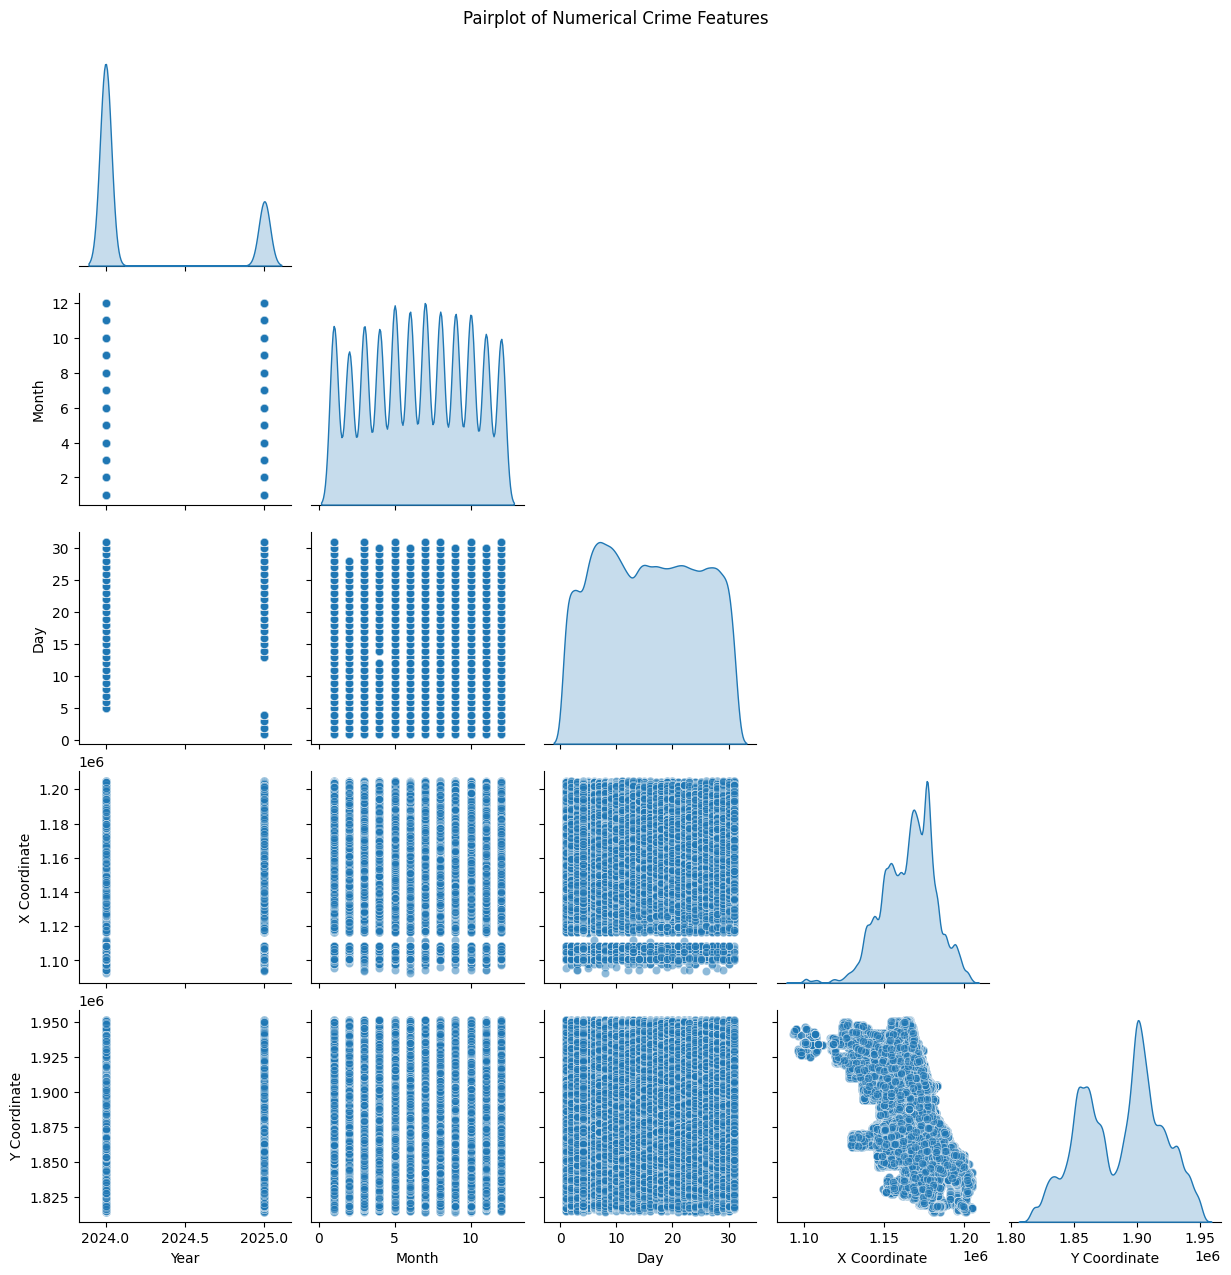

In [31]:
numeric_cols = ['Year', 'Month', 'Day', 'X Coordinate', 'Y Coordinate']

sns.pairplot(chicago[numeric_cols], diag_kind='kde', corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Numerical Crime Features", y=1.02)
plt.show()


<h3>INSIGHT 8 : The scatterplots show that crimes are spread throughout the months and days, meaning crime happens regularly across the year without big gaps.<h3>

<h3>INSIGHT 9 : The X and Y coordinates form a clear cluster, showing that most crimes are concentrated in specific areas of Chicago, not evenly spread out everywhere.<h3>


<h3>How does the distribution of crimes vary across different days of the week?</h3>

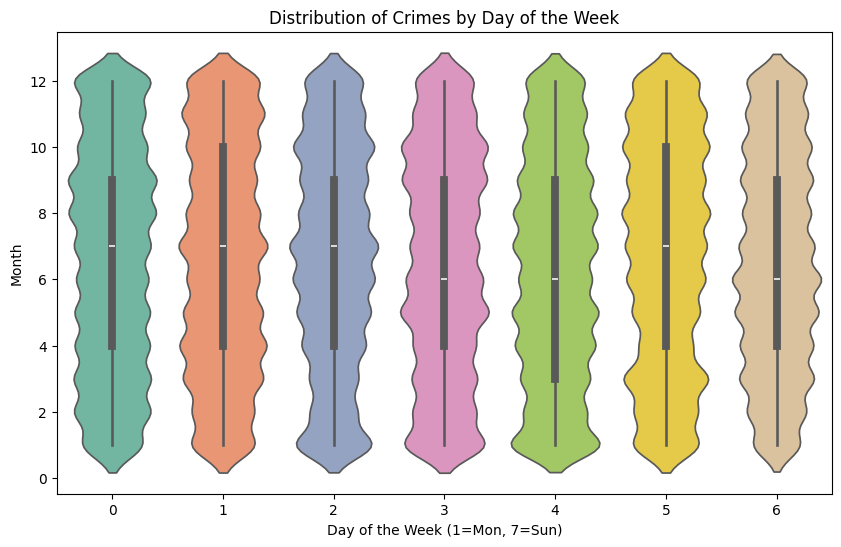

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=chicago, 
    x='DayOfWeek', 
    y='Month', 
    palette='Set2'
)
plt.title("Distribution of Crimes by Day of the Week")
plt.xlabel("Day of the Week (1=Mon, 7=Sun)")
plt.ylabel("Month")
plt.show()


<h3>INSIGHT 10 : Crimes occur fairly evenly across all days of the week. The width of each violin is very similar, showing that no single day (Monday to Sunday) experiences a significantly higher or lower concentration of crime.<h3>

<h3>Which types of crimes are most common in Chicago?</h3>

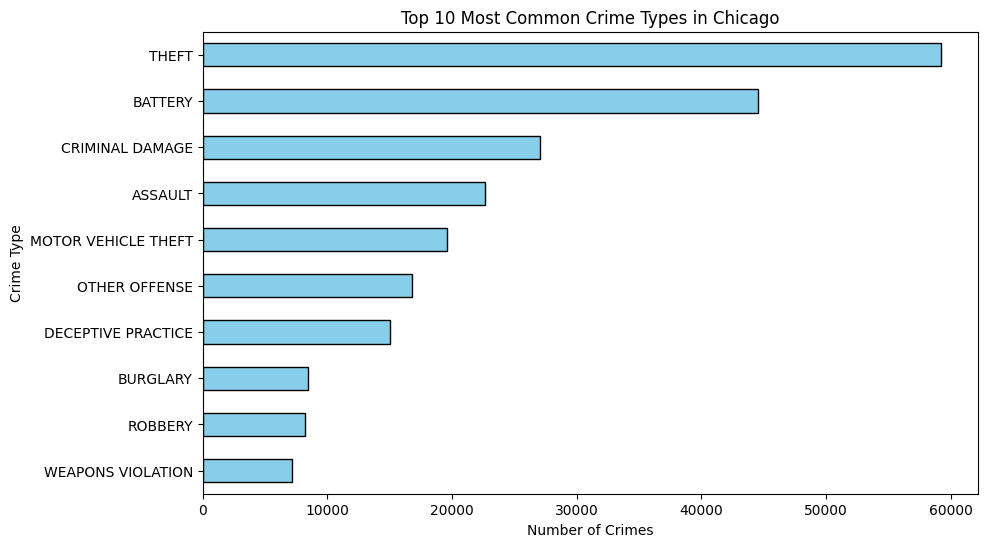

In [30]:
crime_types = chicago['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
crime_types.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Top 10 Most Common Crime Types in Chicago")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.gca().invert_yaxis() 
plt.show()


<h3>INSIGHT 11 : The chart shows that Theft and Battery are the two most common crimes in Chicago, far more frequent than other types. This suggests that property-related and personal confrontations are the biggest crime concerns in the city.<h3>

<h3>How have crime trends changed over the years in Chicago?</h3>

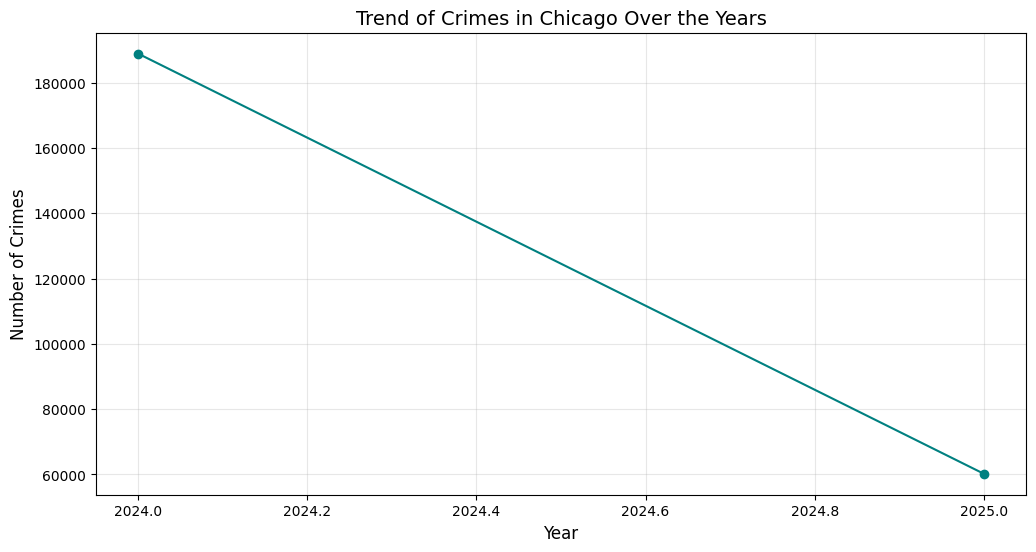

In [27]:
crimes_per_year = chicago.groupby(chicago['Date'].dt.year).size()

plt.figure(figsize=(12,6))
plt.plot(crimes_per_year.index, crimes_per_year.values, marker='o', linestyle='-', color='teal')

plt.title("Trend of Crimes in Chicago Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


<h3>INSIGHT 12 : The line graph shows that crime numbers change from year to year, with some years having more reported crimes while others show a clear drop.<h3>

<h3>What are the top 20 locations in Chicago where crimes most often occur?</h3>

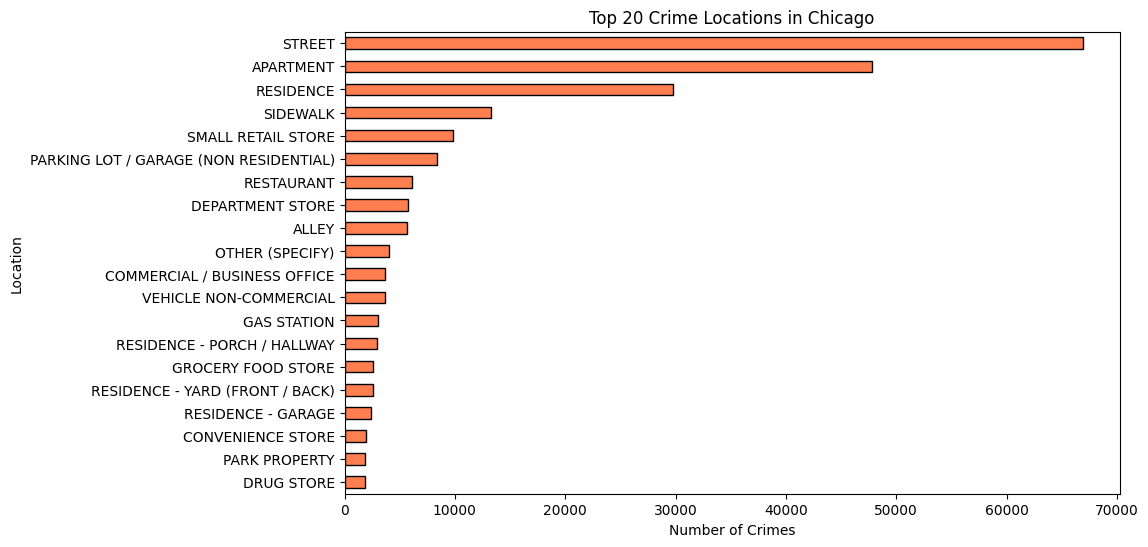

In [28]:
crime_locations = chicago['Location Description'].value_counts().head(20)

plt.figure(figsize=(10,6))
crime_locations.plot(kind='barh', color='coral', edgecolor='black')

plt.title("Top 20 Crime Locations in Chicago")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.gca().invert_yaxis() 
plt.show()


<h3>INSIGHT 13 : Streets have the highest number of crimes by far, making them the top hotspot for criminal activities in Chicago.<h3>

<h3>INSIGHT 14 : After streets, crimes occur most often in apartments and residential homes, showing that both public and private spaces are vulnerable.<h3>

<h3>INSIGHT 15 : Places like restaurants, gas stations, and stores show much fewer incidents compared to streets and residences, meaning most crimes happen in daily living and transit spaces rather than commercial spots.<h3>

<h3>INSIGHT 16 : Sidewalks and parking lots also appear as common crime locations, showing that many incidents happen in open public areas where people walk or park their cars.<h3>

<h3>lowest 20 crime locations in Chicago?</h3>

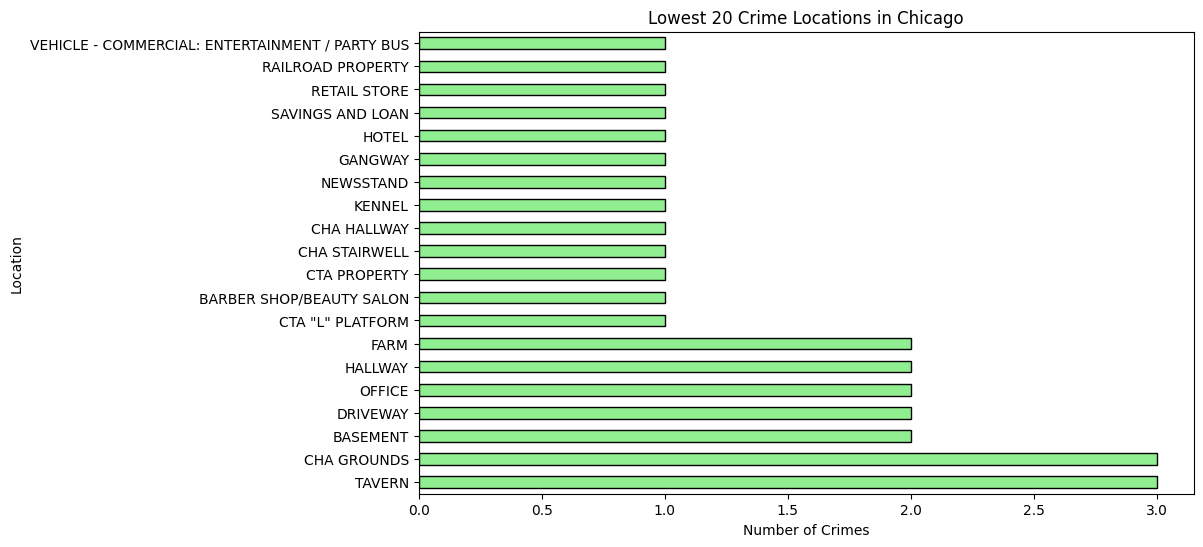

In [29]:
lowest_crime_locations = chicago['Location Description'].value_counts().tail(20)

plt.figure(figsize=(10,6))
lowest_crime_locations.plot(kind='barh', color='lightgreen', edgecolor='black')

plt.title("Lowest 20 Crime Locations in Chicago")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.show()


<h3>INSIGHT 17 : Crimes are least common in places like taverns, basements, and driveways, showing that incidents happen far less often in private or low-traffic areas compared to busy public spaces like streets or apartments.<h3>

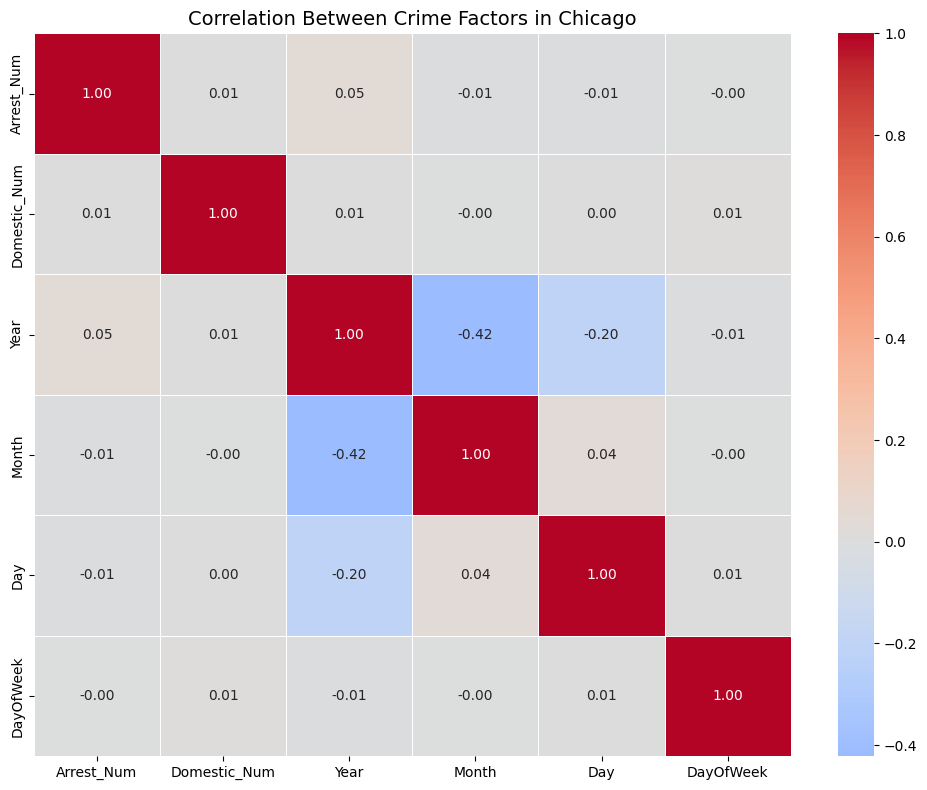

In [33]:
# Create a copy to avoid modifying the original dataset
corr_df = chicago.copy()

# Convert Arrest (True/False) to numeric (1 = Arrest, 0 = No Arrest)
corr_df['Arrest_Num'] = corr_df['Arrest'].astype(int)

# Convert Domestic (True/False) to numeric (1 = Domestic Crime, 0 = Non-Domestic)
corr_df['Domestic_Num'] = corr_df['Domestic'].astype(int)

# Select relevant numeric columns for correlation
correlation_matrix = corr_df[['Arrest_Num', 'Domestic_Num', 'Year', 'Month', 'Day', 'DayOfWeek']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Show correlation values
    fmt=".2f",         # Format values to 2 decimal places
    cmap='coolwarm',   # Blue=negative, Red=positive
    center=0,          # Center at 0 correlation
    linewidths=0.5
)

plt.title('Correlation Between Crime Factors in Chicago', fontsize=14)
plt.tight_layout()
plt.show()


<h3>On which day of the week do most crimes in Chicago occur?</h3>

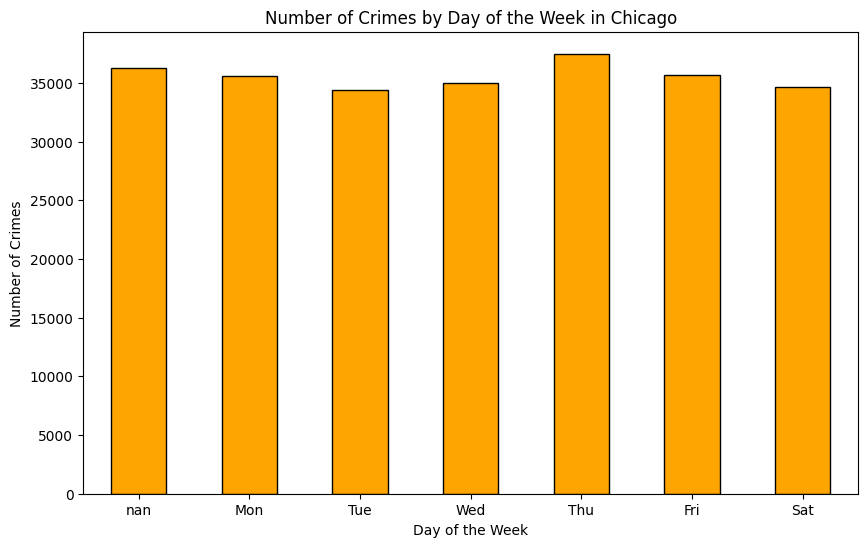

In [35]:
# Count crimes by day of the week
crimes_by_day = chicago['DayOfWeek'].value_counts().sort_index()

# Map numbers to day names for clarity
day_names = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
crimes_by_day.index = crimes_by_day.index.map(day_names)

# Plot bar chart
plt.figure(figsize=(10,6))
crimes_by_day.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Number of Crimes by Day of the Week in Chicago")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.show()



<h3>INSIGHT 18 :Crimes in Chicago happen every day of the week, but some days show higher counts. The busiest days are usually toward the weekend, while midweek tends to have fewer crimes.<h3>

<h3>How is the distribution of crimes spread across different months in Chicago?</h3>

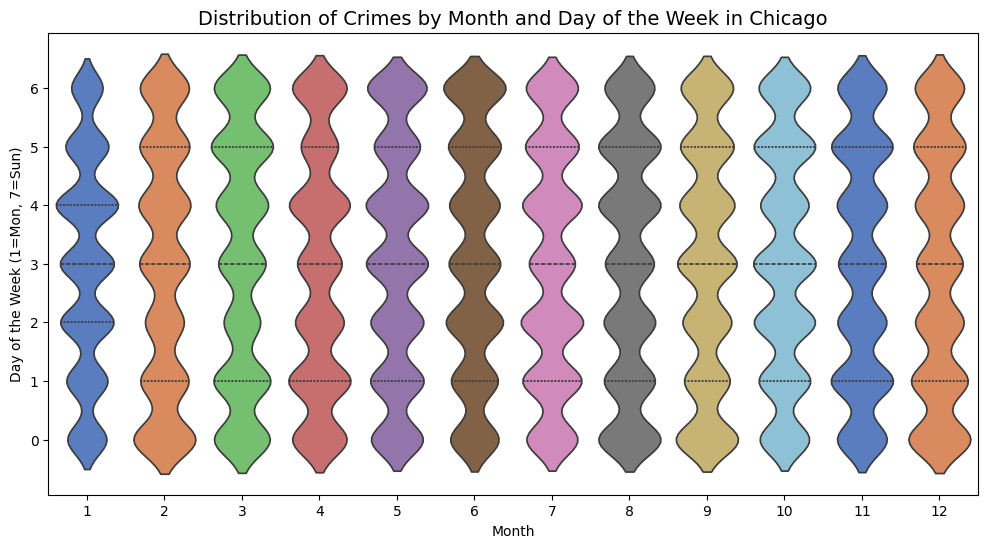

In [37]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=chicago,
    x='Month',
    y='DayOfWeek',
    palette='muted',
    inner='quartile'
)

plt.title("Distribution of Crimes by Month and Day of the Week in Chicago", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Day of the Week (1=Mon, 7=Sun)")
plt.show()


<h3>INSIGHT 19 : Crimes happen in all months and on all days, but the violins show that crime is spread fairly evenly without one month or day standing out too much. This means Chicago crimes aren’t tied to a specific season or weekday they occur consistently throughout the year.<h3>

<h3>INSIGHT 20 : The shape of the violins shows that crimes are not clustered in just a few days instead, they are spread out, meaning crime happens regularly across both weekdays and weekends in every month.<h3>